## Exploratory Visual Analysis

#### This script contains the following:
1. **Importing Visualization Libraries and Data**
2. **Exploring Relationships**
   - Correlations
   - Scatterplots
   - Pair Plots
   - Categorical Plots


#### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import plotly.express as px
import plotly.graph_objects as go

In [2]:
matplotlib.__version__


'3.10.6'

In [3]:
!pip install --upgrade matplotlib numpy pandas


In [2]:
!pip install -q kaleido


In [11]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis'

In [14]:
# Import Data
df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.csv'), low_memory= False)

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0.1                   268519 non-null  int64  
 1   Unnamed: 0                     268519 non-null  int64  
 2   OID_                           268519 non-null  int64  
 3   accident_id                    268519 non-null  object 
 4   state                          268519 non-null  int64  
 5   administrative_region          268519 non-null  int64  
 6   administrative_district        268519 non-null  int64  
 7   municipality                   268519 non-null  int64  
 8   year_of_accident               268519 non-null  int64  
 9   month_of_accident              268519 non-null  int64  
 10  hour_of_accident               268519 non-null  int64  
 11  day_of_week                    268519 non-null  int64  
 12  accident_category             

In [7]:
# Import Data
df_merged_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_new.csv'), low_memory= False)

In [82]:
df_merged.rename(columns={'accident_with _pedestrian': 'accident_with_pedestrian'}, inplace=True)


In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0.1                   268519 non-null  int64  
 1   Unnamed: 0                     268519 non-null  int64  
 2   OID_                           268519 non-null  int64  
 3   accident_id                    268519 non-null  object 
 4   state                          268519 non-null  int64  
 5   administrative_region          268519 non-null  int64  
 6   administrative_district        268519 non-null  int64  
 7   municipality                   268519 non-null  int64  
 8   year_of_accident               268519 non-null  int64  
 9   month_of_accident              268519 non-null  int64  
 10  hour_of_accident               268519 non-null  int64  
 11  day_of_week                    268519 non-null  int64  
 12  accident_category             

In [85]:
# exporting data frame
df_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_merged_new.csv'))

In [17]:
# Import Data
df_state_level_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_state_level_final.csv'), low_memory= False)

In [19]:
# creating state level data frame
df_state_level = df_merged.groupby('state_name').size().reset_index(name='total_accidents_in_state')


In [20]:
# Bring population (get unique population per state)
df_state_level = df_state_level.merge(
    df_merged[['state_name', 'population']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [21]:
# calculating accidents_per_100k
df_state_level['accidents_per_100k'] = (df_state_level['total_accidents_in_state'] / df_state_level['population']) * 100000


In [22]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  
0           277.920354  
1           346.611940  
2           322.805195  
3           329.330709  
4           378.115942  
5           370.052632  
6           280.421875  
7           288.136646  
8           329.402242  
9           329.804469  
10          296.682927  
11          303.061224  
12          317.995050  
13          321.797235  
14          400.375427  
15          261.626794

In [25]:
# exporting data frame
df_state_level.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_state_level.csv'))

### 2. Exploring Relationships

#### Correlations:

#### Aggregating different variables from our data set into one state level data frame.

In [26]:
state_severity = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'state_severity.csv'), low_memory= False)

In [27]:
# creating state level data frame to calculate correlation coefficient
df_state_level = df_state_level.merge(
    state_severity[['state_name', 'Fatal', 'Minor', 'Severe']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [28]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  Fatal  Minor  Severe  
0           277.920354    294  26138    4973  
1           346.611940    454  38336    7656  
2           322.805195     48  10739    1641  
3           329.330709    101   6772    1492  
4           378.115942     10   2333     266  
5           370.052632     36   6398     597  
6           280.421875    182  15165    2600  
7           288.136646     83   3686     870  
8           329.402242    290  22487    3674  
9           329.804469    436  49881    8718  
10          296.682927    114  10111    1939  
11          303.061224     23   2484     463  
12          317.995050    129   9956    2762  
13          321.797235     96   5581    1306  
14          400.375427     82  10082    1567  
15          261.626794     80   4172    1216

In [39]:
# Group accidents by state and count accident of each light condition
df_light_condition= df_merged.groupby('state_name')['light_condition_label'].value_counts().unstack(fill_value=0).reset_index()

In [40]:
df_light_condition

light_condition_label              state_name  darkness  daylight  twilight
0                           Baden-Württemberg      5864     23945      1596
1                                      Bayern      8303     35747      2396
2                                      Berlin      2554      9171       703
3                                 Brandenburg      1440      6509       416
4                                      Bremen       495      1966       148
5                                     Hamburg      1442      5177       412
6                                      Hessen      3721     13309       917
7                      Mecklenburg-Vorpommern       800      3627       212
8                               Niedersachsen      5415     19427      1609
9                         Nordrhein-Westfalen     12125     43561      3349
10                            Rheinland-Pfalz      2233      9284       647
11                                   Saarland       601      2210       159
12                                    Sachsen      2293      9873       681
13                             Sachsen-Anhalt      1283      5311       389
14                         Schleswig-Holstein      2227      8841       663
15                                  Thüringen       969      4199       300

In [41]:
df_state_level = df_state_level.merge(
    df_light_condition[['state_name', 'darkness', 'daylight', 'twilight']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [42]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  Fatal  Minor  Severe  darkness  daylight  twilight  
0           277.920354    294  26138    4973      5864     23945      1596  
1           346.611940    454  38336    7656      8303     35747      2396  
2           322.805195     48  10739    1641      2554      9171       703  
3           329.330709    101   6772    1492      1440      6509       416  
4           378.115942     10   2333     266       495      1966       148  
5           370.052632     36   6398     597      1442      5177       412  
6           280.421875    182  15165    2600      3721     13309       917  
7           288.136646     83   3686     870       800      3627       212  
8           329.402242    290  22487    3674      5415     19427      1609  
9           329.804469    436  49881    8718     12125     43561      3349  
10          296.682927    114  10111    1939      2233      9284       647  
11          303.061224     23   2484     463       601      2210       159  
12          317.995050    129   9956    2762      2293      9873       681  
13          321.797235     96   5581    1306      1283      5311       389  
14          400.375427     82  10082    1567      2227      8841       663  
15          261.626794     80   4172    1216       969      4199       300

In [46]:
# Group accidents by state and count accident of each road condition
df_road_condition= df_merged.groupby('state_name')['road_condition_label'].value_counts().unstack(fill_value=0).reset_index()

In [47]:
df_road_condition

road_condition_label              state_name    Dry  Slippery (winter)  \
0                          Baden-Württemberg  24492                580   
1                                     Bayern  36053                899   
2                                     Berlin   9463                 88   
3                                Brandenburg   6529                192   
4                                     Bremen   1880                 31   
5                                    Hamburg   4922                121   
6                                     Hessen  13357                266   
7                     Mecklenburg-Vorpommern   3417                105   
8                              Niedersachsen  18422                444   
9                        Nordrhein-Westfalen  42506                777   
10                           Rheinland-Pfalz   9058                243   
11                                  Saarland   2158                 47   
12                                   Sachsen   9871                289   
13                            Sachsen-Anhalt   5559                124   
14                        Schleswig-Holstein   8128                402   
15                                 Thüringen   4171                123   

road_condition_label  Wet/damp/slippery  
0                                  6333  
1                                  9494  
2                                  2877  
3                                  1644  
4                                   698  
5                                  1988  
6                                  4324  
7                                  1117  
8                                  7585  
9                                 15752  
10                                 2863  
11                                  765  
12                                 2687  
13                                 1300  
14                                 3201  
15                                 1174

In [48]:
df_state_level = df_state_level.merge(
    df_road_condition[['state_name', 'Dry', 'Slippery (winter)', 'Wet/damp/slippery']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [49]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  Fatal  Minor  Severe  darkness  daylight  twilight  \
0           277.920354    294  26138    4973      5864     23945      1596   
1           346.611940    454  38336    7656      8303     35747      2396   
2           322.805195     48  10739    1641      2554      9171       703   
3           329.330709    101   6772    1492      1440      6509       416   
4           378.115942     10   2333     266       495      1966       148   
5           370.052632     36   6398     597      1442      5177       412   
6           280.421875    182  15165    2600      3721     13309       917   
7           288.136646     83   3686     870       800      3627       212   
8           329.402242    290  22487    3674      5415     19427      1609   
9           329.804469    436  49881    8718     12125     43561      3349   
10          296.682927    114  10111    1939      2233      9284       647   
11          303.061224     23   2484     463       601      2210       159   
12          317.995050    129   9956    2762      2293      9873       681   
13          321.797235     96   5581    1306      1283      5311       389   
14          400.375427     82  10082    1567      2227      8841       663   
15          261.626794     80   4172    1216       969      4199       300   

      Dry  Slippery (winter)  Wet/damp/slippery  
0   24492                580               6333  
1   36053                899               9494  
2    9463                 88               2877  
3    6529                192               1644  
4    1880                 31                698  
5    4922                121               1988  
6   13357                266               4324  
7    3417                105               1117  
8   18422                444               7585  
9   42506                777              15752  
10   9058                243               2863  
11   2158                 47                765  
12   9871                289               2687  
13   5559                124               1300  
14   8128                402               3201  
15   4171                123               1174

In [80]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  Fatal  Minor  Severe  darkness  daylight  twilight  \
0           277.920354    294  26138    4973      5864     23945      1596   
1           346.611940    454  38336    7656      8303     35747      2396   
2           322.805195     48  10739    1641      2554      9171       703   
3           329.330709    101   6772    1492      1440      6509       416   
4           378.115942     10   2333     266       495      1966       148   
5           370.052632     36   6398     597      1442      5177       412   
6           280.421875    182  15165    2600      3721     13309       917   
7           288.136646     83   3686     870       800      3627       212   
8           329.402242    290  22487    3674      5415     19427      1609   
9           329.804469    436  49881    8718     12125     43561      3349   
10          296.682927    114  10111    1939      2233      9284       647   
11          303.061224     23   2484     463       601      2210       159   
12          317.995050    129   9956    2762      2293      9873       681   
13          321.797235     96   5581    1306      1283      5311       389   
14          400.375427     82  10082    1567      2227      8841       663   
15          261.626794     80   4172    1216       969      4199       300   

      Dry  Slippery (winter)  Wet/damp/slippery  
0   24492                580               6333  
1   36053                899               9494  
2    9463                 88               2877  
3    6529                192               1644  
4    1880                 31                698  
5    4922                121               1988  
6   13357                266               4324  
7    3417                105               1117  
8   18422                444               7585  
9   42506                777              15752  
10   9058                243               2863  
11   2158                 47                765  
12   9871                289               2687  
13   5559                124               1300  
14   8128                402               3201  
15   4171                123               1174

In [120]:
# Step 1: Filter to get the names of columns containing 'acc_'
cols_to_drop_filter = df_state_level.filter(regex='^acc\_(.+)$', axis=1).columns
print(f"Columns to drop: {list(cols_to_drop_filter)}")

# Step 2: Drop these columns
df_state_level.drop(columns=cols_to_drop_filter, inplace=True)    # Modifies df directly
print("Columns Names ---------")
for column_name in df_state_level:
    print(column_name)

Columns to drop: []
Columns Names ---------
state_name
total_accidents_in_state
population
accidents_per_100k
as_fatal
as_minor
as_severe
lc_darkness
lc_daylight
lc_twilight
rc_dry
rc_slippery_winter
rc_wet_damp_slippery


C:\Users\muham\AppData\Local\Temp\ipykernel_15740\596771897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_level.drop(columns=cols_to_drop_filter, inplace=True)    # Modifies df directly


In [121]:
# List of binary indicator columns
binary_columns = [
    'accident_with_bicycle',
    'accident_with_pessenger_car',
    'accident_with_pedestrian',
    'accident_with_motorcycle',
    'involving_heavy_goods_vehicle',
    'other_vehicle_involved'         
]

# Group and sum all binary columns by state
state_binary_counts = (
    df_merged_new.groupby('state_name')[binary_columns]
    .sum()
    .reset_index()
)

# Merge into your state-level dataframe
df_state_level = df_state_level.merge(state_binary_counts, on='state_name', how='left')

print("Columns Names ---------")
for column_name in df_state_level:
    print(column_name)

Columns Names ---------
state_name
total_accidents_in_state
population
accidents_per_100k
as_fatal
as_minor
as_severe
lc_darkness
lc_daylight
lc_twilight
rc_dry
rc_slippery_winter
rc_wet_damp_slippery
accident_with_bicycle
accident_with_pessenger_car
accident_with_pedestrian
accident_with_motorcycle
involving_heavy_goods_vehicle
other_vehicle_involved


In [122]:
df_state_level.rename(columns={'Fatal': 'as_fatal', 
'Minor':'as_minor',
'Severe':'as_severe',
'darkness':'lc_darkness',
'daylight':'lc_daylight',
'twilight':'lc_twilight',
'Dry':'rc_dry',
'Slippery (winter)':'rc_slippery_winter',
'Wet/damp/slippery':'rc_wet_damp_slippery',
'accident_with_bicycle':'acc_bicycle',
'accident_with_pessenger_car':'acc_passenger_car',
'accident_with_pedestrian':'acc_pedestrian',
'accident_with_motorcycle':'acc_motorcycle',
'involving_heavy_goods_vehicle':'acc_heavy_vehicle',
'other_vehicle_involved':'acc_other'
                              }, inplace=True)
# Step 1: Filter to get the names of columns containing 'Vital'
#cols_to_drop_filter = df_state_level.filter(regex='^(.+)\_rate$', axis=1).columns
#print(f"Columns to drop: {list(cols_to_drop_filter)}")

# Step 2: Drop these columns
#df_state_level.drop(columns=cols_to_drop_filter, inplace=True)    # Modifies df directly
for column_name in df_state_level:
    print(column_name)

state_name
total_accidents_in_state
population
accidents_per_100k
as_fatal
as_minor
as_severe
lc_darkness
lc_daylight
lc_twilight
rc_dry
rc_slippery_winter
rc_wet_damp_slippery
acc_bicycle
acc_passenger_car
acc_pedestrian
acc_motorcycle
acc_heavy_vehicle
acc_other


In [123]:
df_state_level

state_name  total_accidents_in_state  population  \
0        Baden-Württemberg                     31405    11300000   
1                   Bayern                     46446    13400000   
2                   Berlin                     12428     3850000   
3              Brandenburg                      8365     2540000   
4                   Bremen                      2609      690000   
5                  Hamburg                      7031     1900000   
6                   Hessen                     17947     6400000   
7   Mecklenburg-Vorpommern                      4639     1610000   
8            Niedersachsen                     26451     8030000   
9      Nordrhein-Westfalen                     59035    17900000   
10         Rheinland-Pfalz                     12164     4100000   
11                Saarland                      2970      980000   
12                 Sachsen                     12847     4040000   
13          Sachsen-Anhalt                      6983     2170000   
14      Schleswig-Holstein                     11731     2930000   
15               Thüringen                      5468     2090000   

    accidents_per_100k  as_fatal  as_minor  as_severe  lc_darkness  \
0           277.920354       294     26138       4973         5864   
1           346.611940       454     38336       7656         8303   
2           322.805195        48     10739       1641         2554   
3           329.330709       101      6772       1492         1440   
4           378.115942        10      2333        266          495   
5           370.052632        36      6398        597         1442   
6           280.421875       182     15165       2600         3721   
7           288.136646        83      3686        870          800   
8           329.402242       290     22487       3674         5415   
9           329.804469       436     49881       8718        12125   
10          296.682927       114     10111       1939         2233   
11          303.061224        23      2484        463          601   
12          317.995050       129      9956       2762         2293   
13          321.797235        96      5581       1306         1283   
14          400.375427        82     10082       1567         2227   
15          261.626794        80      4172       1216          969   

    lc_daylight  lc_twilight  rc_dry  rc_slippery_winter  \
0         23945         1596   24492                 580   
1         35747         2396   36053                 899   
2          9171          703    9463                  88   
3          6509          416    6529                 192   
4          1966          148    1880                  31   
5          5177          412    4922                 121   
6         13309          917   13357                 266   
7          3627          212    3417                 105   
8         19427         1609   18422                 444   
9         43561         3349   42506                 777   
10         9284          647    9058                 243   
11         2210          159    2158                  47   
12         9873          681    9871                 289   
13         5311          389    5559                 124   
14         8841          663    8128                 402   
15         4199          300    4171                 123   

    rc_wet_damp_slippery  acc_bicycle  acc_passenger_car  acc_pedestrian  \
0                   6333        10307              22021            2458   
1                   9494        16581              31553            3383   
2                   2877         4452               9978            1712   
3                   1644         2909               6173             613   
4                    698          956               1992             378   
5                   1988         2854               4603             911   
6                   4324         3868              14764            1702   
7                   1117         1472  

In [131]:
rate_columns = ['as_fatal','lc_darkness','lc_daylight','lc_twilight','rc_dry','rc_slippery_winter','rc_wet_damp_slippery',
                'ac_bicycle','acc_passenger_car','acc_pedestrian','acc_motorcycle','acc_heavy_vehicle','acc_other']
for column_name in df_state_level:
    if column_name in rate_columns:
        df_state_level[column_name + '_rate'] = df_state_level[column_name] / df_state_level['total_accidents_in_state']
        print(f"Column:{column_name}")

Column:as_fatal
Column:lc_darkness
Column:lc_daylight
Column:lc_twilight
Column:rc_dry
Column:rc_slippery_winter
Column:rc_wet_damp_slippery
Column:acc_passenger_car
Column:acc_pedestrian
Column:acc_motorcycle
Column:acc_heavy_vehicle
Column:acc_other


In [132]:
for column_name in df_state_level:
    print(column_name)

state_name
total_accidents_in_state
population
accidents_per_100k
as_fatal
as_minor
as_severe
lc_darkness
lc_daylight
lc_twilight
rc_dry
rc_slippery_winter
rc_wet_damp_slippery
acc_bicycle
acc_passenger_car
acc_pedestrian
acc_motorcycle
acc_heavy_vehicle
acc_other
as_fatal_rate
lc_darkness_rate
lc_daylight_rate
lc_twilight_rate
rc_dry_rate
rc_slippery_winter_rate
rc_wet_damp_slippery_rate
acc_passenger_car_rate
acc_pedestrian_rate
acc_motorcycle_rate
acc_heavy_vehicle_rate
acc_other_rate


In [141]:
# exporting data frame
df_state_level.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_state_level_final.csv'))

In [4]:
# Import Data
df_state_level_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_state_level_final.csv'), low_memory= False)

In [8]:
df_state_level_final = df_state_level_final.merge(
    df_merged_new[['state', 'state_name']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [30]:
df_state_level_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 16 non-null     int64  
 1   state_name                 16 non-null     object 
 2   total_accidents_in_state   16 non-null     int64  
 3   population                 16 non-null     int64  
 4   accidents_per_100k         16 non-null     float64
 5   as_fatal                   16 non-null     int64  
 6   as_minor                   16 non-null     int64  
 7   as_severe                  16 non-null     int64  
 8   lc_darkness                16 non-null     int64  
 9   lc_daylight                16 non-null     int64  
 10  lc_twilight                16 non-null     int64  
 11  rc_dry                     16 non-null     int64  
 12  rc_slippery_winter         16 non-null     int64  
 13  rc_wet_damp_slippery       16 non-null     int64  
 

In [31]:
df_state_level_final= df_state_level_final.drop(columns=['Unnamed: 0'])


In [32]:
# exporting data frame
df_state_level_final.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_state_level_final.csv'), index=False)

#### Create a correlation heatmap using seaborn:

In [9]:
# Create a subset 
col_subset_for_correl_2 = df_state_level_final[[
                            'as_fatal_rate',
                            'lc_darkness_rate',
                            'lc_daylight_rate',
                            'lc_twilight_rate',
                            'rc_dry_rate',
                            'rc_slippery_winter_rate',
                            'rc_wet_damp_slippery_rate', 
                            'acc_passenger_car_rate',
                            'acc_pedestrian_rate',
                            'acc_motorcycle_rate',
                            'acc_heavy_vehicle_rate', 
                            'acc_other_rate',
                            'accidents_per_100k'
                                             ]]

In [10]:
#creating correlation matrix with numerical values only
corr_matrix = col_subset_for_correl_2.corr()

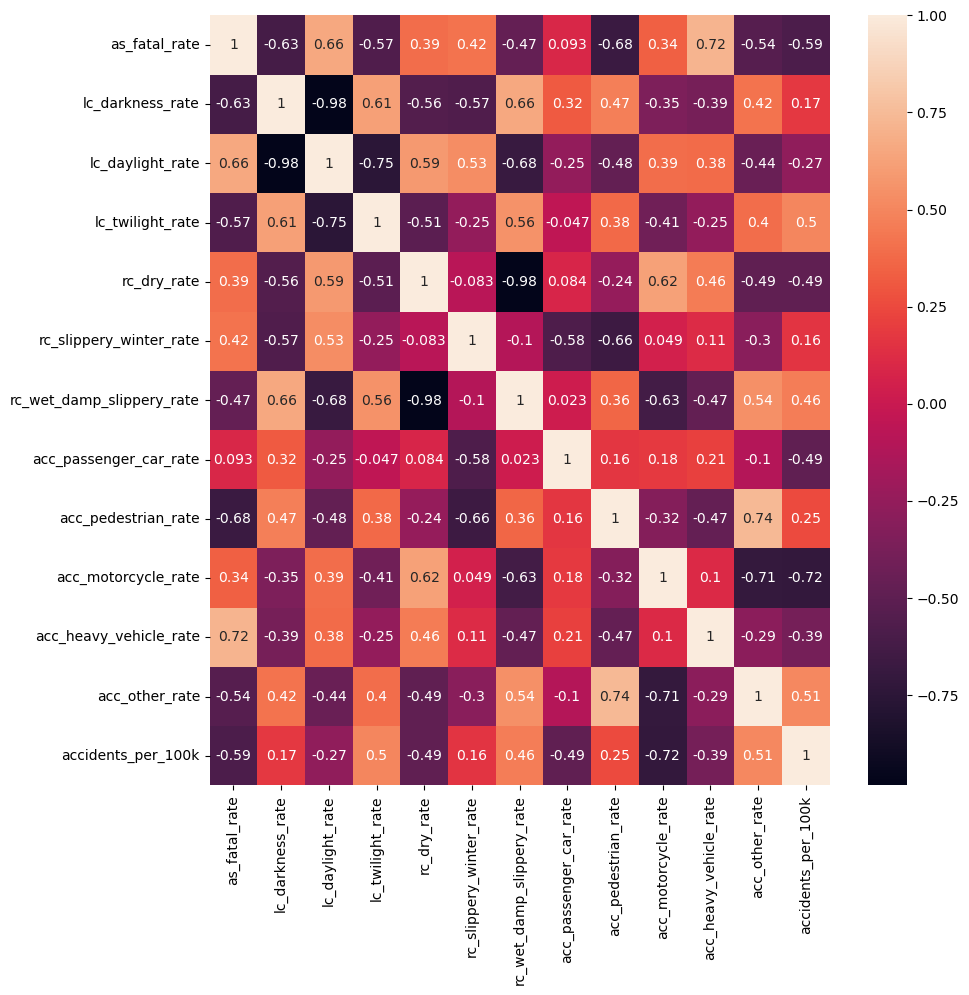

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(col_subset_for_correl_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

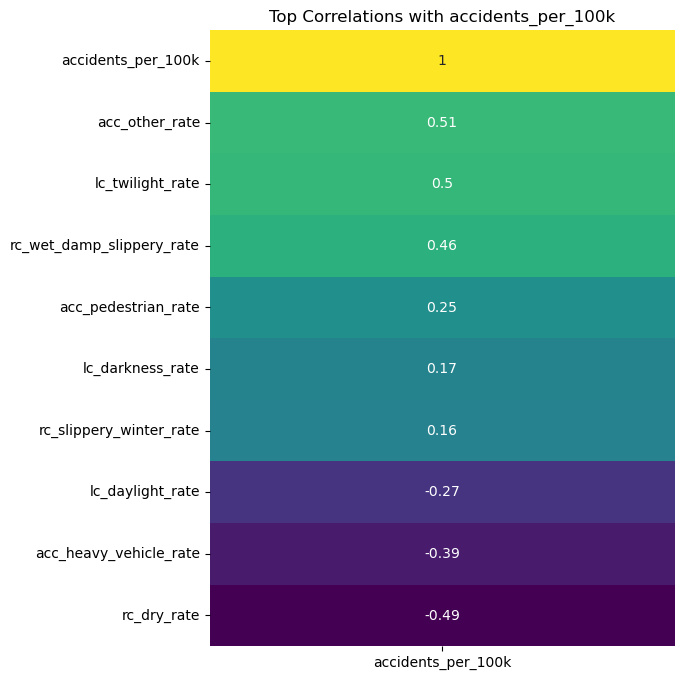

In [12]:
# filtering out variables that have the strongest correlation with our dependent variable accidents_per_100k
target = "accidents_per_100k"
top_corr = corr_matrix[target].sort_values(ascending=False).head(10)

plt.figure(figsize=(6,8))
sns.heatmap(top_corr.to_frame(), annot=True, cmap='viridis', cbar=False)
plt.title(f"Top Correlations with {target}")
plt.show()

##### acc_other_rate	+0.51----States with a higher proportion of “other” accident types tend to have more accidents per capita.
##### lc_twilight_rate	+0.50----States where more accidents happen at twilight tend to have higher accident rates.
##### rc_wet_damp_slippery_rate	+0.46----Wet or damp road conditions are associated with higher accident frequencies.
##### acc_heavy_vehicle_rate	−0.39----States with more heavy vehicle–involved accidents tend to have fewer total accidents per capita — possibly because such accidents happen on major roads but are rarer overall.
##### rc_dry_rate	−0.49----A higher share of dry-road accidents corresponds to lower total accident rates — wetter or slipperier conditions seem to increase risk.

### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

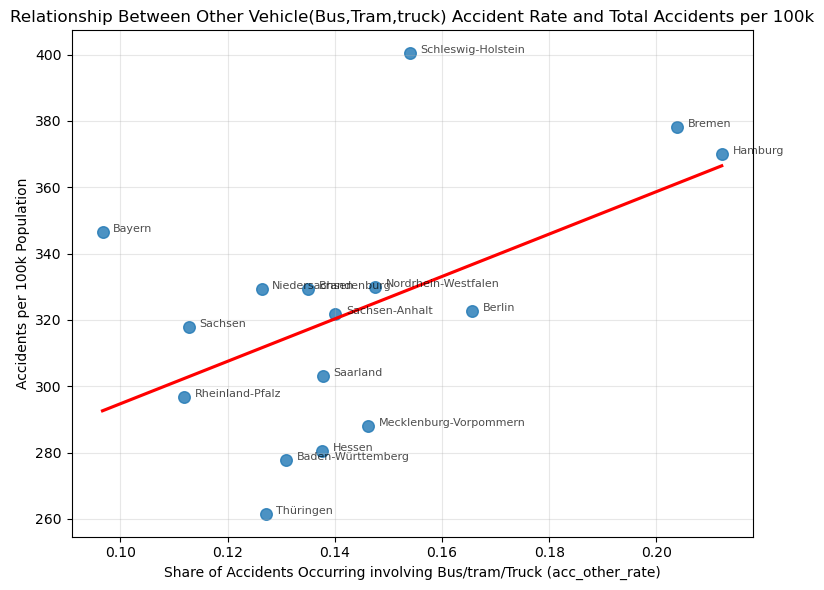

In [29]:

# Relationship Between other vehicle(Bus,Tram,truck) Accident Rate and Total Accidents per 100k
# correlation coefficient +0.51
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_state_level_final,
    x='acc_other_rate',
    y='accidents_per_100k',
    scatter_kws={'s':70, 'alpha':0.8},
    line_kws={'color':'red'},
    ci=None
)

# Optionally label each state
for i, row in df_state_level_final.iterrows():
    plt.text(
        row['acc_other_rate'] + 0.002,  # small horizontal offset
        row['accidents_per_100k'],
        row['state_name'],
        fontsize=8,
        alpha=0.7
    )

plt.title("Relationship Between Other Vehicle(Bus,Tram,truck) Accident Rate and Total Accidents per 100k")
plt.xlabel("Share of Accidents Occurring involving Bus/tram/Truck (acc_other_rate)")
plt.ylabel("Accidents per 100k Population")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# save the plot
plt.savefig("other_vehicle_vs_accidents_per_100k.png", dpi=300, bbox_inches='tight')

plt.show()

#### The states where more Bus/Tram/truck accidents happen tend to have more accidents per 100k population as compared to other states.

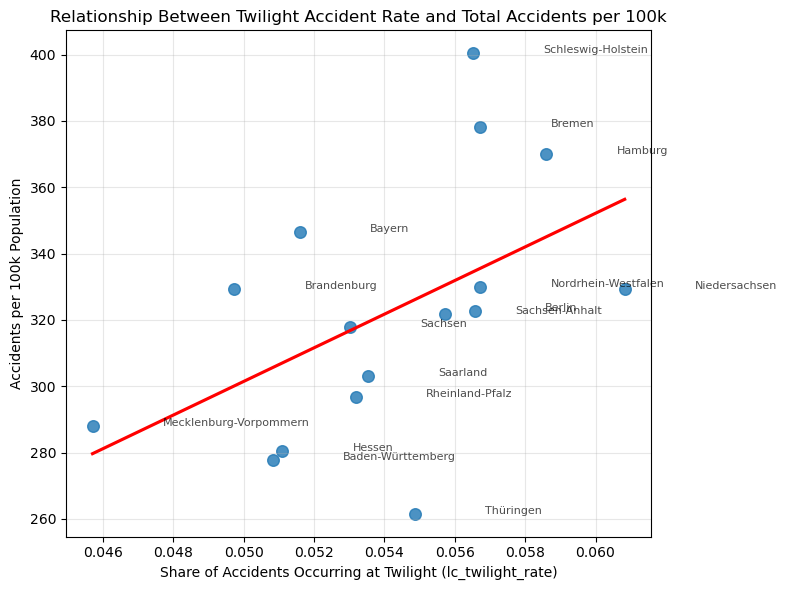

In [25]:

# Relationship Between Twilight Accident Rate and Total Accidents per 100k
# correlation coefficient +0.50
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_state_level_final,
    x='lc_twilight_rate',
    y='accidents_per_100k',
    scatter_kws={'s':70, 'alpha':0.8},
    line_kws={'color':'red'},
    ci=None
)

# Optionally label each state
for i, row in df_state_level_final.iterrows():
    plt.text(
        row['lc_twilight_rate'] + 0.002,  # small horizontal offset
        row['accidents_per_100k'],
        row['state_name'],
        fontsize=8,
        alpha=0.7
    )

plt.title("Relationship Between Twilight Accident Rate and Total Accidents per 100k")
plt.xlabel("Share of Accidents Occurring at Twilight (lc_twilight_rate)")
plt.ylabel("Accidents per 100k Population")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# save the plot
plt.savefig("twilight_vs_accidents_per_100k.png", dpi=300, bbox_inches='tight')

plt.show()


#### States where more accidents happen at twilight tend to have higher accident rate per 100k population as compared to other states.

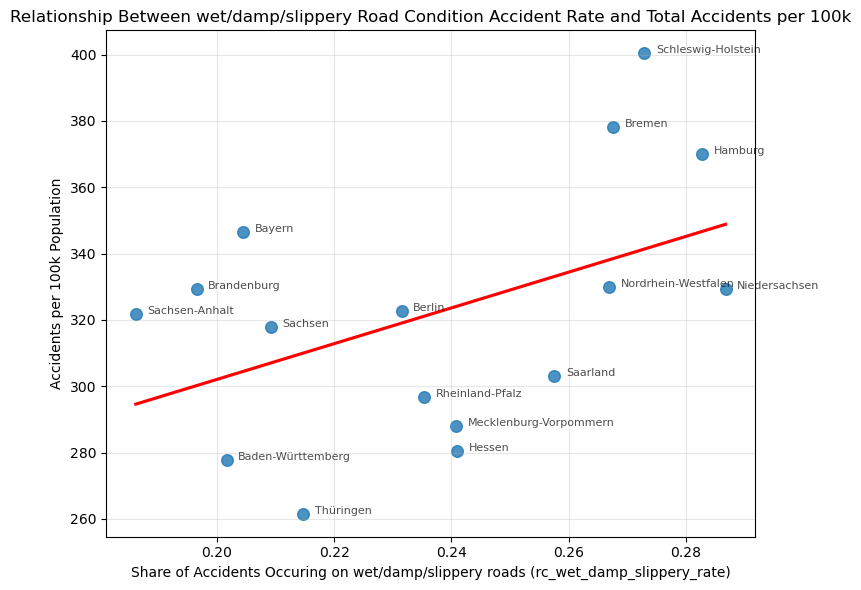

In [26]:
# Scatter plot with regression line
# correlation coefficient +0.46
#Relationship Between wet/damp/slippery road condition Rate and Total Accidents per 100k
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_state_level_final,
    x='rc_wet_damp_slippery_rate',
    y='accidents_per_100k',
    scatter_kws={'s':70, 'alpha':0.8},
    line_kws={'color':'red'},
    ci=None
)

# Optionally label each state
for i, row in df_state_level_final.iterrows():
    plt.text(
        row['rc_wet_damp_slippery_rate'] + 0.002,  # small horizontal offset
        row['accidents_per_100k'],
        row['state_name'],
        fontsize=8,
        alpha=0.7
    )

plt.title("Relationship Between wet/damp/slippery Road Condition Accident Rate and Total Accidents per 100k")
plt.xlabel("Share of Accidents Occuring on wet/damp/slippery roads (rc_wet_damp_slippery_rate)")
plt.ylabel("Accidents per 100k Population")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# save the plot
plt.savefig("wet_road_vs_accidents_per_100k.png", dpi=300, bbox_inches='tight')

plt.show()

#### -Wet or damp road conditions are associated with higher accident frequencies.

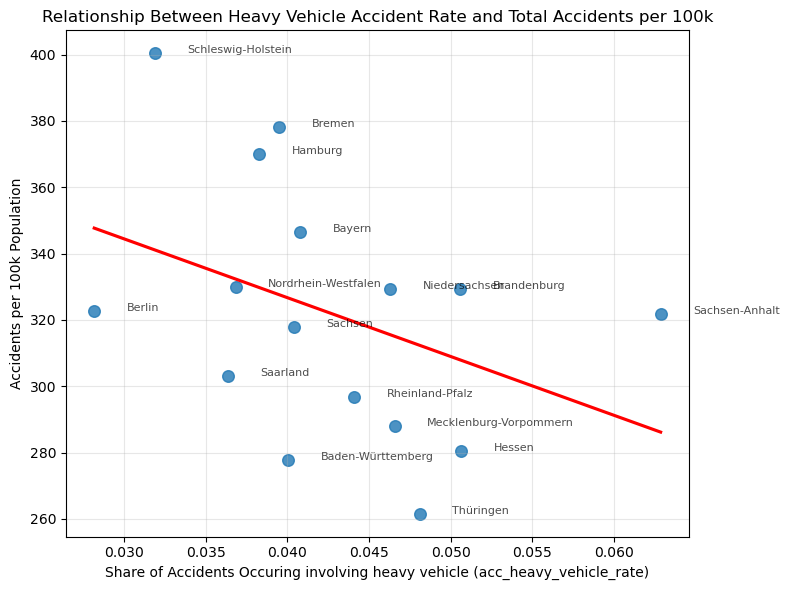

In [27]:
# Scatter plot with regression line
# correlation coefficient -0.39
#Relationship Between heavy vehicle accident Rate and Total Accidents per 100k
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_state_level_final,
    x='acc_heavy_vehicle_rate',
    y='accidents_per_100k',
    scatter_kws={'s':70, 'alpha':0.8},
    line_kws={'color':'red'},
    ci=None
)

# Optionally label each state
for i, row in df_state_level_final.iterrows():
    plt.text(
        row['acc_heavy_vehicle_rate'] + 0.002,  # small horizontal offset
        row['accidents_per_100k'],
        row['state_name'],
        fontsize=8,
        alpha=0.7
    )

plt.title("Relationship Between Heavy Vehicle Accident Rate and Total Accidents per 100k")
plt.xlabel("Share of Accidents Occuring involving heavy vehicle (acc_heavy_vehicle_rate)")
plt.ylabel("Accidents per 100k Population")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# save the plot
plt.savefig("heavy_vehicle_vs_accidents_per_100k.png", dpi=300, bbox_inches='tight')

plt.show()

#### States with more heavy vehicle–involved accidents tend to have fewer total accidents per capita — possibly because such accidents happen on major roads but are rarer overall.

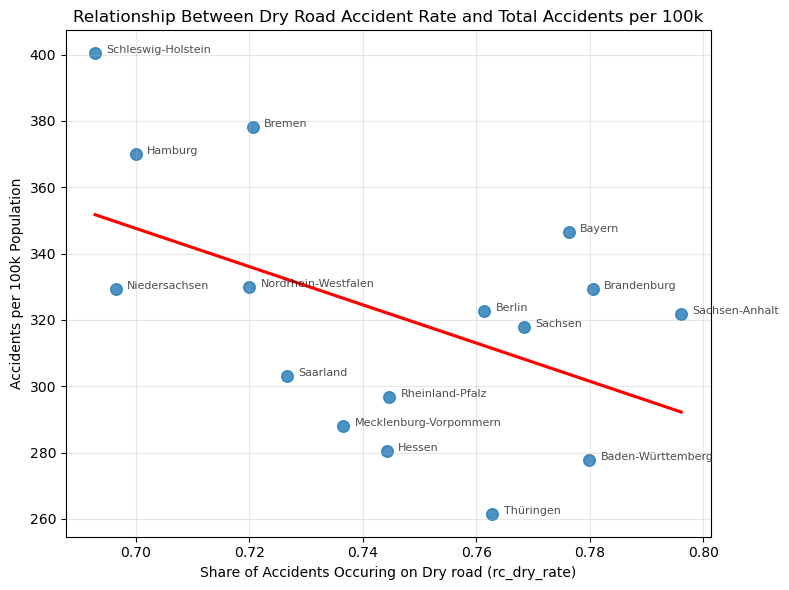

In [28]:

# Scatter plot with regression line
# correlation coefficient -0.49
#Relationship Between dry road accident Rate and Total Accidents per 100k
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_state_level_final,
    x='rc_dry_rate',
    y='accidents_per_100k',
    scatter_kws={'s':70, 'alpha':0.8},
    line_kws={'color':'red'},
    ci=None
)

# Optionally label each state
for i, row in df_state_level_final.iterrows():
    plt.text(
        row['rc_dry_rate'] + 0.002,  # small horizontal offset
        row['accidents_per_100k'],
        row['state_name'],
        fontsize=8,
        alpha=0.7
    )

plt.title("Relationship Between Dry Road Accident Rate and Total Accidents per 100k")
plt.xlabel("Share of Accidents Occuring on Dry road (rc_dry_rate)")
plt.ylabel("Accidents per 100k Population")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# save the plot
plt.savefig("dry_road_vs_accidents_per_100k.png", dpi=300, bbox_inches='tight')

plt.show()

#### A higher share of dry-road accidents corresponds to lower total accident rates — wetter or slipperier conditions seem to increase risk.

### Pair Plots:

In [7]:
# # Keep only the variables you want to use in the pair plot
sub_2 = sub [["population", "accidents_in_state", "accidents_per_100k"]]


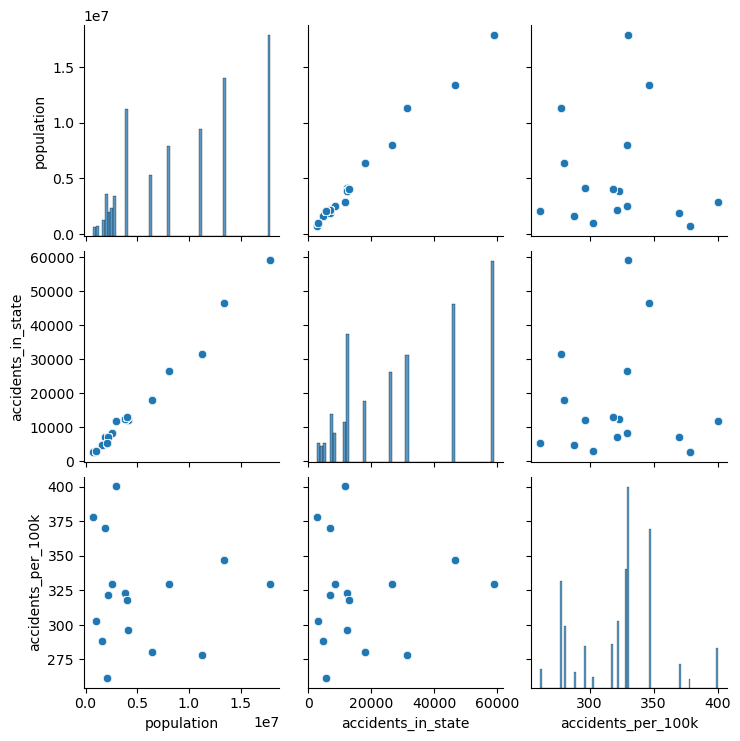

In [8]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [9]:
# saving figure
g.savefig("pairplot.png")

##### 1) Population vs accidents_in_state show a strong linear relationship, the larger the population more total accidents.
##### 2) Population vs accidents_per_100k show no clear trend, the points are scattered randomly. Some high-population areas have both high and low accident rates per 100k. This implies that Per-capita accident rates are independent of population size,So a large state isn’t necessarily safer or more dangerous per person.
##### 3) accident_in_state vs accidents_per_100k also do not show any clear correlation. A place with many total accidents does not necessarily have higher per-capita rates. Raw numbers can be misleading — per-capita rate is the fair comparison metric.

### Categorical Plots:

#### using the two categorical variables road_surface_conditions and light_conditions to answer some key questions.

#### Do wet roads correlate with higher accident rates?

In [43]:
# Mapping codes for better understanding 
road_condition_map = {
    0: "Dry",
    1: "Wet/damp/slippery",
    2: "Slippery (winter)"
}

df_merged['road_condition_label'] = df_merged['road_surface_conditions'].map(road_condition_map)

In [25]:
df_merged[['state_name', 'road_condition_label']].drop_duplicates()

state_name road_condition_label
0           Schleswig-Holstein                  Dry
1           Schleswig-Holstein    Wet/damp/slippery
812         Schleswig-Holstein    Slippery (winter)
2675                   Hamburg                  Dry
2689                   Hamburg    Wet/damp/slippery
2743                   Hamburg    Slippery (winter)
7677             Niedersachsen    Wet/damp/slippery
7698             Niedersachsen                  Dry
7805             Niedersachsen    Slippery (winter)
22375      Nordrhein-Westfalen    Wet/damp/slippery
22385      Nordrhein-Westfalen                  Dry
22694                   Bremen                  Dry
22695                   Bremen    Wet/damp/slippery
22713                   Bremen    Slippery (winter)
25180      Nordrhein-Westfalen    Slippery (winter)
60608                   Hessen    Slippery (winter)
60614                   Hessen    Wet/damp/slippery
60617                   Hessen                  Dry
72160          Rheinland-Pfalz    Wet/damp/slippery
72164          Rheinland-Pfalz                  Dry
72419          Rheinland-Pfalz    Slippery (winter)
78276        Baden-Württemberg    Slippery (winter)
78278        Baden-Württemberg                  Dry
78281        Baden-Württemberg    Wet/damp/slippery
98000                   Bayern    Slippery (winter)
98004                   Bayern    Wet/damp/slippery
98023                   Bayern                  Dry
121081                  Berlin                  Dry
121088                  Berlin    Wet/damp/slippery
121290                  Berlin    Slippery (winter)
122976             Brandenburg                  Dry
122979             Brandenburg    Wet/damp/slippery
123679             Brandenburg    Slippery (winter)
126667  Mecklenburg-Vorpommern    Wet/damp/slippery
126669  Mecklenburg-Vorpommern    Slippery (winter)
126671  Mecklenburg-Vorpommern                  Dry
129443                 Sachsen    Wet/damp/slippery
129444                 Sachsen                  Dry
129458                 Sachsen    Slippery (winter)
137217          Sachsen-Anhalt    Wet/damp/slippery
137218          Sachsen-Anhalt                  Dry
137286          Sachsen-Anhalt    Slippery (winter)
139009               Thüringen    Wet/damp/slippery
139010               Thüringen                  Dry
139033               Thüringen    Slippery (winter)
142570                Saarland                  Dry
142575                Saarland    Wet/damp/slippery
142715                Saarland    Slippery (winter)

In [44]:
# Grouping states by name and road condition
road_condition_type = (
    df_merged.groupby(['state_name', 'road_condition_label'])
    .size()
    .reset_index(name='count')
)

In [27]:
road_condition_type

state_name road_condition_label  count
0        Baden-Württemberg                  Dry  24492
1        Baden-Württemberg    Slippery (winter)    580
2        Baden-Württemberg    Wet/damp/slippery   6333
3                   Bayern                  Dry  36053
4                   Bayern    Slippery (winter)    899
5                   Bayern    Wet/damp/slippery   9494
6                   Berlin                  Dry   9463
7                   Berlin    Slippery (winter)     88
8                   Berlin    Wet/damp/slippery   2877
9              Brandenburg                  Dry   6529
10             Brandenburg    Slippery (winter)    192
11             Brandenburg    Wet/damp/slippery   1644
12                  Bremen                  Dry   1880
13                  Bremen    Slippery (winter)     31
14                  Bremen    Wet/damp/slippery    698
15                 Hamburg                  Dry   4922
16                 Hamburg    Slippery (winter)    121
17                 Hamburg    Wet/damp/slippery   1988
18                  Hessen                  Dry  13357
19                  Hessen    Slippery (winter)    266
20                  Hessen    Wet/damp/slippery   4324
21  Mecklenburg-Vorpommern                  Dry   3417
22  Mecklenburg-Vorpommern    Slippery (winter)    105
23  Mecklenburg-Vorpommern    Wet/damp/slippery   1117
24           Niedersachsen                  Dry  18422
25           Niedersachsen    Slippery (winter)    444
26           Niedersachsen    Wet/damp/slippery   7585
27     Nordrhein-Westfalen                  Dry  42506
28     Nordrhein-Westfalen    Slippery (winter)    777
29     Nordrhein-Westfalen    Wet/damp/slippery  15752
30         Rheinland-Pfalz                  Dry   9058
31         Rheinland-Pfalz    Slippery (winter)    243
32         Rheinland-Pfalz    Wet/damp/slippery   2863
33                Saarland                  Dry   2158
34                Saarland    Slippery (winter)     47
35                Saarland    Wet/damp/slippery    765
36                 Sachsen                  Dry   9871
37                 Sachsen    Slippery (winter)    289
38                 Sachsen    Wet/damp/slippery   2687
39          Sachsen-Anhalt                  Dry   5559
40          Sachsen-Anhalt    Slippery (winter)    124
41          Sachsen-Anhalt    Wet/damp/slippery   1300
42      Schleswig-Holstein                  Dry   8128
43      Schleswig-Holstein    Slippery (winter)    402
44      Schleswig-Holstein    Wet/damp/slippery   3201
45               Thüringen                  Dry   4171
46               Thüringen    Slippery (winter)    123
47               Thüringen    Wet/damp/slippery   1174

In [28]:
# Bring population into the aggregated table (get unique population per state)
road_condition_type = road_condition_type.merge(
    df_merged[['state_name', 'population']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [29]:
road_condition_type

state_name road_condition_label  count  population
0        Baden-Württemberg                  Dry  24492    11300000
1        Baden-Württemberg    Slippery (winter)    580    11300000
2        Baden-Württemberg    Wet/damp/slippery   6333    11300000
3                   Bayern                  Dry  36053    13400000
4                   Bayern    Slippery (winter)    899    13400000
5                   Bayern    Wet/damp/slippery   9494    13400000
6                   Berlin                  Dry   9463     3850000
7                   Berlin    Slippery (winter)     88     3850000
8                   Berlin    Wet/damp/slippery   2877     3850000
9              Brandenburg                  Dry   6529     2540000
10             Brandenburg    Slippery (winter)    192     2540000
11             Brandenburg    Wet/damp/slippery   1644     2540000
12                  Bremen                  Dry   1880      690000
13                  Bremen    Slippery (winter)     31      690000
14                  Bremen    Wet/damp/slippery    698      690000
15                 Hamburg                  Dry   4922     1900000
16                 Hamburg    Slippery (winter)    121     1900000
17                 Hamburg    Wet/damp/slippery   1988     1900000
18                  Hessen                  Dry  13357     6400000
19                  Hessen    Slippery (winter)    266     6400000
20                  Hessen    Wet/damp/slippery   4324     6400000
21  Mecklenburg-Vorpommern                  Dry   3417     1610000
22  Mecklenburg-Vorpommern    Slippery (winter)    105     1610000
23  Mecklenburg-Vorpommern    Wet/damp/slippery   1117     1610000
24           Niedersachsen                  Dry  18422     8030000
25           Niedersachsen    Slippery (winter)    444     8030000
26           Niedersachsen    Wet/damp/slippery   7585     8030000
27     Nordrhein-Westfalen                  Dry  42506    17900000
28     Nordrhein-Westfalen    Slippery (winter)    777    17900000
29     Nordrhein-Westfalen    Wet/damp/slippery  15752    17900000
30         Rheinland-Pfalz                  Dry   9058     4100000
31         Rheinland-Pfalz    Slippery (winter)    243     4100000
32         Rheinland-Pfalz    Wet/damp/slippery   2863     4100000
33                Saarland                  Dry   2158      980000
34                Saarland    Slippery (winter)     47      980000
35                Saarland    Wet/damp/slippery    765      980000
36                 Sachsen                  Dry   9871     4040000
37                 Sachsen    Slippery (winter)    289     4040000
38                 Sachsen    Wet/damp/slippery   2687     4040000
39          Sachsen-Anhalt                  Dry   5559     2170000
40          Sachsen-Anhalt    Slippery (winter)    124     2170000
41          Sachsen-Anhalt    Wet/damp/slippery   1300     2170000
42      Schleswig-Holstein                  Dry   8128     2930000
43      Schleswig-Holstein    Slippery (winter)    402     2930000
44      Schleswig-Holstein    Wet/damp/slippery   3201     2930000
45               Thüringen                  Dry   4171     2090000
46               Thüringen    Slippery (winter)    123     2090000
47               Thüringen    Wet/damp/slippery   1174     2090000

In [30]:
road_condition_type['accident_per_100k_per_roadtype'] = (
    road_condition_type['count'] / road_condition_type['population']) * 100000

In [31]:
road_condition_type

state_name road_condition_label  count  population  \
0        Baden-Württemberg                  Dry  24492    11300000   
1        Baden-Württemberg    Slippery (winter)    580    11300000   
2        Baden-Württemberg    Wet/damp/slippery   6333    11300000   
3                   Bayern                  Dry  36053    13400000   
4                   Bayern    Slippery (winter)    899    13400000   
5                   Bayern    Wet/damp/slippery   9494    13400000   
6                   Berlin                  Dry   9463     3850000   
7                   Berlin    Slippery (winter)     88     3850000   
8                   Berlin    Wet/damp/slippery   2877     3850000   
9              Brandenburg                  Dry   6529     2540000   
10             Brandenburg    Slippery (winter)    192     2540000   
11             Brandenburg    Wet/damp/slippery   1644     2540000   
12                  Bremen                  Dry   1880      690000   
13                  Bremen    Slippery (winter)     31      690000   
14                  Bremen    Wet/damp/slippery    698      690000   
15                 Hamburg                  Dry   4922     1900000   
16                 Hamburg    Slippery (winter)    121     1900000   
17                 Hamburg    Wet/damp/slippery   1988     1900000   
18                  Hessen                  Dry  13357     6400000   
19                  Hessen    Slippery (winter)    266     6400000   
20                  Hessen    Wet/damp/slippery   4324     6400000   
21  Mecklenburg-Vorpommern                  Dry   3417     1610000   
22  Mecklenburg-Vorpommern    Slippery (winter)    105     1610000   
23  Mecklenburg-Vorpommern    Wet/damp/slippery   1117     1610000   
24           Niedersachsen                  Dry  18422     8030000   
25           Niedersachsen    Slippery (winter)    444     8030000   
26           Niedersachsen    Wet/damp/slippery   7585     8030000   
27     Nordrhein-Westfalen                  Dry  42506    17900000   
28     Nordrhein-Westfalen    Slippery (winter)    777    17900000   
29     Nordrhein-Westfalen    Wet/damp/slippery  15752    17900000   
30         Rheinland-Pfalz                  Dry   9058     4100000   
31         Rheinland-Pfalz    Slippery (winter)    243     4100000   
32         Rheinland-Pfalz    Wet/damp/slippery   2863     4100000   
33                Saarland                  Dry   2158      980000   
34                Saarland    Slippery (winter)     47      980000   
35                Saarland    Wet/damp/slippery    765      980000   
36                 Sachsen                  Dry   9871     4040000   
37                 Sachsen    Slippery (winter)    289     4040000   
38                 Sachsen    Wet/damp/slippery   2687     4040000   
39          Sachsen-Anhalt                  Dry   5559     2170000   
40          Sachsen-Anhalt    Slippery (winter)    124     2170000   
41          Sachsen-Anhalt    Wet/damp/slippery   1300     2170000   
42      Schleswig-Holstein                  Dry   8128     2930000   
43      Schleswig-Holstein    Slippery (winter)    402     2930000   
44      Schleswig-Holstein    Wet/damp/slippery   3201     2930000   
45               Thüringen                  Dry   4171     2090000   
46               Thüringen    Slippery (winter)    123     2090000   
47               Thüringen    Wet/damp/slippery   1174     2090000   

    accident_per_100k_per_roadtype  
0                       216.743363  
1                         5.132743  
2                        56.044248  
3                       269.052239  
4                         6.708955  
5                        70.850746  
6                       245.792208  
7                         2.285714  
8                        74.727273  
9                       257.047244  
10                        7.559055  
11                       64.724409  
12                      272.463768  
13                        4.492754  
14                      101.15

In [47]:
# Group by road surface and calculate average accident rate
road_condition_type.groupby('road_condition_label')['accident_per_100k_per_roadtype'].mean()

road_condition_label
Dry                  239.161388
Slippery (winter)      6.018218
Wet/damp/slippery     76.954185
Name: accident_per_100k_per_roadtype, dtype: float64

Text(0.5, 1.0, 'Accident Rates vs Road Surface Conditions')

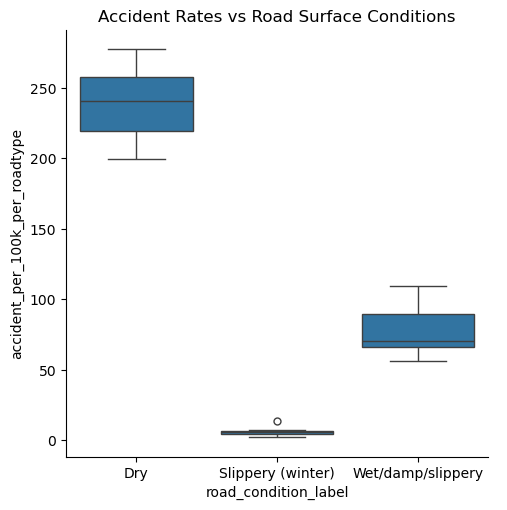

In [37]:
g1 = sns.catplot(
    x="road_condition_label",
    y="accident_per_100k_per_roadtype",
    data=road_condition_type,
    kind="box"
)
plt.title("Accident Rates vs Road Surface Conditions")

#### Looking at this box plot we can clearly see that most accidents occur under dry road conditions, wet and slippery accidents have much smaller avergaes as comapred to dry road accidents. We can say that since roads are mostly dry all year round, hence higher accident rate. Moreover even in winter/snow season roads are well matintained to avoid slippery conditions and use of winter tyers is mandatory by law, which also prevents cars from skidding and causing accidents.

In [38]:
# saving figure
g1.savefig("road condition vs accident.png")

### How does light conditions imapct accident rate?

In [37]:
# Mapping codes for better understanding 

light_condition_labels = {
    0: "daylight",
    1: "twilight",
    2: "darkness"
}

df_merged['light_condition_label'] = df_merged['light_conditions'].map(light_condition_labels)


In [50]:
df_merged[['state_name', 'light_condition_label']].drop_duplicates()

state_name light_condition_label
0           Schleswig-Holstein              darkness
2           Schleswig-Holstein              daylight
10          Schleswig-Holstein             twilight 
2675                   Hamburg              darkness
2676                   Hamburg              daylight
2690                   Hamburg             twilight 
7677             Niedersachsen              daylight
7679             Niedersachsen             twilight 
7681             Niedersachsen              darkness
22375      Nordrhein-Westfalen             twilight 
22376      Nordrhein-Westfalen              daylight
22378      Nordrhein-Westfalen              darkness
22694                   Bremen              daylight
22695                   Bremen             twilight 
22697                   Bremen              darkness
60608                   Hessen              daylight
60610                   Hessen              darkness
60627                   Hessen             twilight 
72160          Rheinland-Pfalz              daylight
72161          Rheinland-Pfalz              darkness
72181          Rheinland-Pfalz             twilight 
78276        Baden-Württemberg              darkness
78277        Baden-Württemberg             twilight 
78280        Baden-Württemberg              daylight
98000                   Bayern              daylight
98004                   Bayern             twilight 
98011                   Bayern              darkness
121081                  Berlin              darkness
121082                  Berlin              daylight
121084                  Berlin             twilight 
122976             Brandenburg              daylight
122977             Brandenburg              darkness
122998             Brandenburg             twilight 
126667  Mecklenburg-Vorpommern              daylight
126671  Mecklenburg-Vorpommern             twilight 
126676  Mecklenburg-Vorpommern              darkness
129443                 Sachsen              darkness
129446                 Sachsen              daylight
129456                 Sachsen             twilight 
137217          Sachsen-Anhalt              darkness
137218          Sachsen-Anhalt              daylight
137226          Sachsen-Anhalt             twilight 
139009               Thüringen              daylight
139011               Thüringen             twilight 
139013               Thüringen              darkness
142570                Saarland              daylight
142572                Saarland              darkness
142598                Saarland             twilight

In [68]:
# Grouping states by name and road condition
light_condition_type = (
    df_merged.groupby(['state_name', 'light_condition_label'])
    .size()
    .reset_index(name='count')
)

In [69]:
light_condition_type

state_name light_condition_label  count
0        Baden-Württemberg              darkness   5864
1        Baden-Württemberg              daylight  23945
2        Baden-Württemberg             twilight    1596
3                   Bayern              darkness   8303
4                   Bayern              daylight  35747
5                   Bayern             twilight    2396
6                   Berlin              darkness   2554
7                   Berlin              daylight   9171
8                   Berlin             twilight     703
9              Brandenburg              darkness   1440
10             Brandenburg              daylight   6509
11             Brandenburg             twilight     416
12                  Bremen              darkness    495
13                  Bremen              daylight   1966
14                  Bremen             twilight     148
15                 Hamburg              darkness   1442
16                 Hamburg              daylight   5177
17                 Hamburg             twilight     412
18                  Hessen              darkness   3721
19                  Hessen              daylight  13309
20                  Hessen             twilight     917
21  Mecklenburg-Vorpommern              darkness    800
22  Mecklenburg-Vorpommern              daylight   3627
23  Mecklenburg-Vorpommern             twilight     212
24           Niedersachsen              darkness   5415
25           Niedersachsen              daylight  19427
26           Niedersachsen             twilight    1609
27     Nordrhein-Westfalen              darkness  12125
28     Nordrhein-Westfalen              daylight  43561
29     Nordrhein-Westfalen             twilight    3349
30         Rheinland-Pfalz              darkness   2233
31         Rheinland-Pfalz              daylight   9284
32         Rheinland-Pfalz             twilight     647
33                Saarland              darkness    601
34                Saarland              daylight   2210
35                Saarland             twilight     159
36                 Sachsen              darkness   2293
37                 Sachsen              daylight   9873
38                 Sachsen             twilight     681
39          Sachsen-Anhalt              darkness   1283
40          Sachsen-Anhalt              daylight   5311
41          Sachsen-Anhalt             twilight     389
42      Schleswig-Holstein              darkness   2227
43      Schleswig-Holstein              daylight   8841
44      Schleswig-Holstein             twilight     663
45               Thüringen              darkness    969
46               Thüringen              daylight   4199
47               Thüringen             twilight     300

In [67]:
# Bring population into the aggregated table (get unique population per state)
light_condition_type = light_condition_type.merge(
    df_merged[['state_name', 'population']].drop_duplicates(),
    on='state_name',
    how='left'
)

In [54]:
light_condition_type['accident_per_100k_per_lightcondition'] = (
    light_condition_type['count'] / light_condition_type['population']) * 100000

In [55]:
light_condition_type

state_name light_condition_label  count  population  \
0        Baden-Württemberg              darkness   5864    11300000   
1        Baden-Württemberg              daylight  23945    11300000   
2        Baden-Württemberg             twilight    1596    11300000   
3                   Bayern              darkness   8303    13400000   
4                   Bayern              daylight  35747    13400000   
5                   Bayern             twilight    2396    13400000   
6                   Berlin              darkness   2554     3850000   
7                   Berlin              daylight   9171     3850000   
8                   Berlin             twilight     703     3850000   
9              Brandenburg              darkness   1440     2540000   
10             Brandenburg              daylight   6509     2540000   
11             Brandenburg             twilight     416     2540000   
12                  Bremen              darkness    495      690000   
13                  Bremen              daylight   1966      690000   
14                  Bremen             twilight     148      690000   
15                 Hamburg              darkness   1442     1900000   
16                 Hamburg              daylight   5177     1900000   
17                 Hamburg             twilight     412     1900000   
18                  Hessen              darkness   3721     6400000   
19                  Hessen              daylight  13309     6400000   
20                  Hessen             twilight     917     6400000   
21  Mecklenburg-Vorpommern              darkness    800     1610000   
22  Mecklenburg-Vorpommern              daylight   3627     1610000   
23  Mecklenburg-Vorpommern             twilight     212     1610000   
24           Niedersachsen              darkness   5415     8030000   
25           Niedersachsen              daylight  19427     8030000   
26           Niedersachsen             twilight    1609     8030000   
27     Nordrhein-Westfalen              darkness  12125    17900000   
28     Nordrhein-Westfalen              daylight  43561    17900000   
29     Nordrhein-Westfalen             twilight    3349    17900000   
30         Rheinland-Pfalz              darkness   2233     4100000   
31         Rheinland-Pfalz              daylight   9284     4100000   
32         Rheinland-Pfalz             twilight     647     4100000   
33                Saarland              darkness    601      980000   
34                Saarland              daylight   2210      980000   
35                Saarland             twilight     159      980000   
36                 Sachsen              darkness   2293     4040000   
37                 Sachsen              daylight   9873     4040000   
38                 Sachsen             twilight     681     4040000   
39          Sachsen-Anhalt              darkness   1283     2170000   
40          Sachsen-Anhalt              daylight   5311     2170000   
41          Sachsen-Anhalt             twilight     389     2170000   
42      Schleswig-Holstein              darkness   2227     2930000   
43      Schleswig-Holstein              daylight   8841     2930000   
44      Schleswig-Holstein             twilight     663     2930000   
45               Thüringen              darkness    969     2090000   
46               Thüringen              daylight   4199     2090000   
47               Thüringen             twilight     300     2090000   

    accident_per_100k_per_lightcondition  
0                              51.893805  
1                             211.902655  
2                              14.123894  
3                              61.962687  
4                             266.768657  
5                              17.880597  
6                              66.337662  
7                             238.207792  
8                              18.259740  
9                              56.692913  
10                            256.259843  
11                  

In [56]:
# Group by road surface and calculate average accident rate
light_condition_type.groupby('light_condition_label')['accident_per_100k_per_lightcondition'].mean()

light_condition_label
darkness      61.347832
daylight     243.299204
twilight      17.486755
Name: accident_per_100k_per_lightcondition, dtype: float64

Text(0.5, 1.0, 'Accident Rates vs Light Conditions')

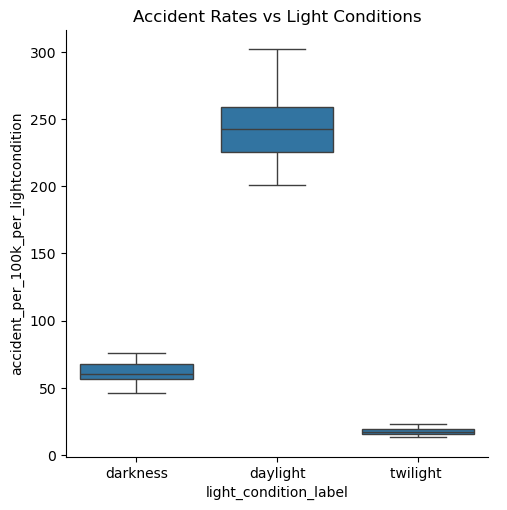

In [57]:
g4 = sns.catplot(
    x="light_condition_label",
    y="accident_per_100k_per_lightcondition",
    data=light_condition_type,
    kind="box"
)
plt.title("Accident Rates vs Light Conditions")

In [58]:
# saving figure
g4.savefig("light condition vs accident.png")

##### looking at this box plot we can clearly see that day light condition has the widest spread and the highest mean, indicating day light accidents are most common across all states. One reason of this could be that the traffic flow is highest during the day time.

#### Which states have highest accident rate?

In [33]:
state_rankings = (
    df_merged[['state_name', 'accidents_per_100k']]
    .drop_duplicates()
    .sort_values('accidents_per_100k', ascending=False)
)

print(state_rankings)


                    state_name  accidents_per_100k
0           Schleswig-Holstein          400.375427
22694                   Bremen          378.115942
2675                   Hamburg          370.052632
98000                   Bayern          346.611940
22375      Nordrhein-Westfalen          329.804469
7677             Niedersachsen          329.402242
122976             Brandenburg          329.330709
121081                  Berlin          322.805195
137217          Sachsen-Anhalt          321.797235
129443                 Sachsen          317.995050
142570                Saarland          303.061224
72160          Rheinland-Pfalz          296.682927
126667  Mecklenburg-Vorpommern          288.136646
60608                   Hessen          280.421875
78276        Baden-Württemberg          277.920354
139009               Thüringen          261.626794


In [14]:
!pip uninstall -y plotly
!pip install plotly==5.18.0 kaleido


Found existing installation: plotly 6.3.1
Uninstalling plotly-6.3.1:
  Successfully uninstalled plotly-6.3.1
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   --- ------------------------------------ 1.3/15.6 MB 7.1 MB/s eta 0:00:03
   ------- -------------------------------- 2.9/15.6 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/15.6 MB 6.9 MB/s eta 0:00:02
   -------------- ------------------------- 5.8/15.6 MB 6.8 MB/s eta 0:00:02
   ----------------- ---------------------- 6.8/15.6 MB 6.5 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/15.6 MB 6.5 MB/s eta 0:00:02
   ------------------------ --------------- 9.4/15.6 MB 6.5 MB/s eta 0:00:01
   --------------------------- ------------ 10.7/15.6 MB 6.5 MB/s eta 0:00:01
   ------------------------------- -------- 12.3/15.6 MB 6.5 MB/s eta 0:00:01
   ---------------------------------- ----- 13.6/15.6 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 14.9

In [6]:
import sys
!{sys.executable} -m pip install -U kaleido


In [10]:
import sys
!{sys.executable} -m pip install --upgrade "kaleido==0.2.1"


   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
    --------------------------------------- 1.3/65.9 MB 7.0 MB/s eta 0:00:10
   - -------------------------------------- 2.9/65.9 MB 6.9 MB/s eta 0:00:10
   -- ------------------------------------- 4.2/65.9 MB 6.8 MB/s eta 0:00:10
   --- ------------------------------------ 5.8/65.9 MB 6.8 MB/s eta 0:00:09
   ---- ----------------------------------- 7.1/65.9 MB 6.7 MB/s eta 0:00:09
   ----- ---------------------------------- 8.4/65.9 MB 6.7 MB/s eta 0:00:09
   ----- ---------------------------------- 9.7/65.9 MB 6.7 MB/s eta 0:00:09
   ------ --------------------------------- 11.0/65.9 MB 6.7 MB/s eta 0:00:09
   ------- -------------------------------- 12.6/65.9 MB 6.7 MB/s eta 0:00:09
   -------- ------------------------------- 13.9/65.9 MB 6.7 MB/s eta 0:00:08
   --------- ------------------------------ 15.2/65.9 MB 6.7 MB/s eta 0:00:08
   ---------- ----------------------------- 16.5/65.9 MB 6.6 MB/s eta 0:00:08
 

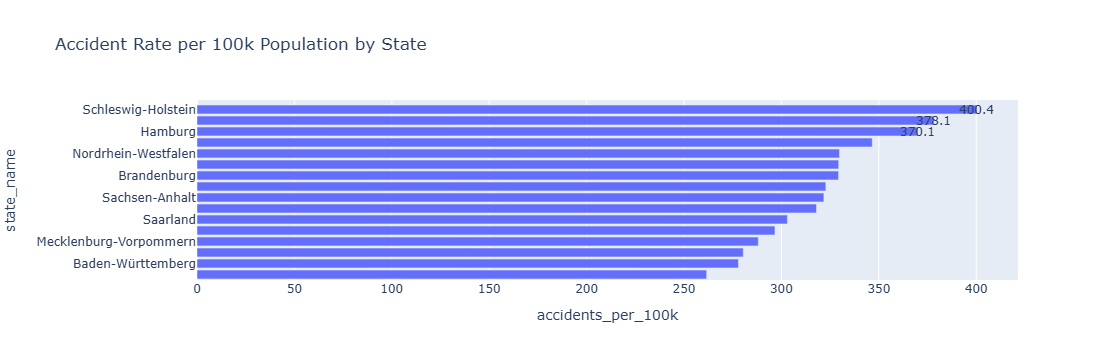

In [34]:
# visualizing state rankings based on accident rate

fig = px.bar(
    state_rankings,
    x='accidents_per_100k',
    y='state_name',
    orientation='h',
    title='Accident Rate per 100k Population by State'
)

# Label top 3
for i, row in state_rankings.head(3).iterrows():
    fig.add_annotation(
        x=row['accidents_per_100k'],
        y=row['state_name'],
        text=f"{row['accidents_per_100k']:.1f}",
        showarrow=False
    )

fig.update_yaxes(autorange="reversed")
fig.show()



#### Schleswig-holstein, Bremen and Hamburg have the highest accident rate per 100k population.

In [37]:
# saving figure as html
fig.write_html("top_accident_states.html", include_plotlyjs="cdn")



In [8]:
conda install -c plotly plotly-orca


Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - plotly
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\muham\anaconda3

  added / updated specs:
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-orca-1.3.1          |                1        56.8 MB  plotly
    ------------------------------------------------------------
                                           Total:        56.8 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/win-64::plotly-orca-1.3.1-1 



plotly-orca-1.3.1    | 56.8 MB   |            |   0% 
plotly-orca-1.3.1    | 56.8 MB   | ########## | 100% 
plotly-orca-1.3.1    | 56.8 MB   | ########## | 100% 
plotly-orca-1.3.1    | 56.8 MB   | ########## | 100% 
                                                     
 do



==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [36]:
# saving figure
fig.write_image("top_accident_states.png", engine="orca")


In [ ]:
## function for saving image in future
#def export_plot(fig, filename_base):
   # fig.write_html(f"{filename_base}.html", include_plotlyjs="cdn")
   # try:
       # fig.write_image(f"{filename_base}.png", engine="orca")
   # except:
      #  print("PNG export failed – falling back to HTML only")
   # print(f"Saved: {filename_base}.html and {filename_base}.png")


#### Which kind of accidents are occuring the most?

In [4]:
# Mapping codes for better understanding 
collision_type_labels = {
    1: "Collision with starting/stopping vehicle",
    2: "Rear-end collision",
    3: "Side collision (same direction)",
    4: "Head-on collision",
    5: "Crossing/turn collision",
    6: "Vehicle-pedestrian collision",
    7: "Collision with obstacle",
    8: "Ran off road (right)",
    9: "Ran off road (left)",
    0: "Other"
}

df_merged['collision_type_label'] = df_merged['collision_type'].map(collision_type_labels)


In [5]:
# Grouping states by name and collision type
frequency_collision_type = (
    df_merged.groupby(['state_name', 'collision_type_label'])
    .size()
    .reset_index(name='count')
)


In [6]:
frequency_collision_type.head()


state_name                      collision_type_label  count
0  Baden-Württemberg                   Collision with obstacle    262
1  Baden-Württemberg  Collision with starting/stopping vehicle   1576
2  Baden-Württemberg                   Crossing/turn collision   7945
3  Baden-Württemberg                         Head-on collision   2518
4  Baden-Württemberg                                     Other   5741

In [20]:
frequency_collision_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state_name                160 non-null    object
 1   collision_type_label      160 non-null    object
 2   count                     160 non-null    int64 
 3   total_accidents_in_state  160 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.1+ KB


In [7]:
# calculating percentage of each collision type
total_accidents_per_state = df_merged.groupby('state_name').size()


frequency_collision_type['total_accidents_in_state'] = frequency_collision_type['state_name'].map(total_accidents_per_state)

frequency_collision_type['percentage_in_state'] = (
    frequency_collision_type['count'] / frequency_collision_type['total_accidents_in_state']) * 100



In [8]:
frequency_collision_type

state_name                      collision_type_label  count  \
0    Baden-Württemberg                   Collision with obstacle    262   
1    Baden-Württemberg  Collision with starting/stopping vehicle   1576   
2    Baden-Württemberg                   Crossing/turn collision   7945   
3    Baden-Württemberg                         Head-on collision   2518   
4    Baden-Württemberg                                     Other   5741   
..                 ...                                       ...    ...   
155          Thüringen                       Ran off road (left)    422   
156          Thüringen                      Ran off road (right)    701   
157          Thüringen                        Rear-end collision    756   
158          Thüringen           Side collision (same direction)    289   
159          Thüringen              Vehicle-pedestrian collision    467   

     total_accidents_in_state  percentage_in_state  
0                       31405             0.834262  
1                       31405             5.018309  
2                       31405            25.298519  
3                       31405             8.017832  
4                       31405            18.280529  
..                        ...                  ...  
155                      5468             7.717630  
156                      5468            12.820044  
157                      5468            13.825896  
158                      5468             5.285296  
159                      5468             8.540600  

[160 rows x 5 columns]

In [9]:
# Top 3 collision types in each state
top3_collision_per_state = (
    frequency_collision_type
    .sort_values(['state_name', 'percentage_in_state'], ascending=[True, False])
    .groupby('state_name')
    .head(3)
)

In [15]:
top3_collision_per_state.head(10)

state_name          collision_type_label  count  \
2   Baden-Württemberg       Crossing/turn collision   7945   
4   Baden-Württemberg                         Other   5741   
7   Baden-Württemberg            Rear-end collision   5496   
14             Bayern                         Other  10625   
12             Bayern       Crossing/turn collision  10428   
17             Bayern            Rear-end collision   6641   
22             Berlin       Crossing/turn collision   4810   
27             Berlin            Rear-end collision   2153   
29             Berlin  Vehicle-pedestrian collision   1607   
32        Brandenburg       Crossing/turn collision   2545   

    total_accidents_in_state  percentage_in_state  
2                      31405            25.298519  
4                      31405            18.280529  
7                      31405            17.500398  
14                     46446            22.876028  
12                     46446            22.451880  
17                     46446            14.298325  
22                     12428            38.702929  
27                     12428            17.323785  
29                     12428            12.930480  
32                      8365            30.424387

In [16]:
# Calculate Total Accidents
total_accidents= df_merged['accident_id'].count()

# Calculate percentage of top 3 collision types

top3_total_accidents = top3_collision_per_state['count'].sum()

collision_percentage = (top3_total_accidents / total_accidents) * 100

In [17]:
collision_percentage

np.float64(59.94361665282531)

C:\Users\muham\anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



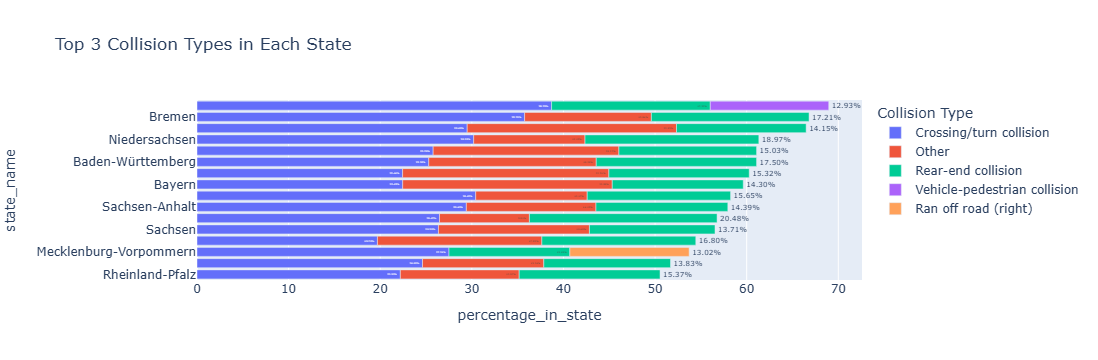

In [25]:
# visualizing top collision types in each state

fig = px.bar(
    top3_collision_per_state,
    x='percentage_in_state',
    y='state_name',
    color='collision_type_label',
    orientation='h',
    title='Top 3 Collision Types in Each State',
    text='percentage_in_state'  # This will display numbers on bars
)

# Format the text on bars to 2 decimal points + %
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')  # move text outside the bars
fig.update_yaxes(categoryorder='total ascending') 
fig.update_layout(legend_title_text='Collision Type')

fig.show()


#### These top 5 collision types makeup 60% of total accidents. Crossing/turn collision, rear-end collision and other are the most common collision types across states.

In [26]:
fig.write_image("top_collision_type.png", engine="orca")


#### what accident behaviors are most common?

In [60]:
# Mapping codes for better understanding 
accident_behaviour_labels = {
    1: "Driving Error",
    2: "Turn-Off Accident",
    3: "Turn/Cross Collision",
    4: "Pedestrian/Road Crossing",
    5: "Stationary Collision",
    6: "Same-Direction Collision",
    7: "Other"
}


df_merged['accident_behaviour_label'] = df_merged['accident_behavior_type'].map(accident_behaviour_labels)

In [61]:
# Grouping states by name and accident behaviour
frequency_behaviour_type = (
    df_merged.groupby(['state_name', 'accident_behaviour_label'])
    .size()
    .reset_index(name='count')
)


In [62]:
frequency_behaviour_type

state_name  accident_behaviour_label  count
0    Baden-Württemberg             Driving Error   6387
1    Baden-Württemberg                     Other   4848
2    Baden-Württemberg  Pedestrian/Road Crossing   1136
3    Baden-Württemberg  Same-Direction Collision   8467
4    Baden-Württemberg      Stationary Collision    813
..                 ...                       ...    ...
107          Thüringen  Pedestrian/Road Crossing    250
108          Thüringen  Same-Direction Collision   1335
109          Thüringen      Stationary Collision    117
110          Thüringen         Turn-Off Accident    493
111          Thüringen      Turn/Cross Collision   1156

[112 rows x 3 columns]

In [63]:
# calculating percentage of each accident behaviour
total_accidents_per_state = df_merged.groupby('state_name').size()


frequency_behaviour_type['total_accidents_in_state'] = frequency_behaviour_type['state_name'].map(total_accidents_per_state)

frequency_behaviour_type['percentage_in_state'] = (
    frequency_behaviour_type['count'] / frequency_behaviour_type['total_accidents_in_state']) * 100

In [64]:
frequency_behaviour_type

state_name  accident_behaviour_label  count  \
0    Baden-Württemberg             Driving Error   6387   
1    Baden-Württemberg                     Other   4848   
2    Baden-Württemberg  Pedestrian/Road Crossing   1136   
3    Baden-Württemberg  Same-Direction Collision   8467   
4    Baden-Württemberg      Stationary Collision    813   
..                 ...                       ...    ...   
107          Thüringen  Pedestrian/Road Crossing    250   
108          Thüringen  Same-Direction Collision   1335   
109          Thüringen      Stationary Collision    117   
110          Thüringen         Turn-Off Accident    493   
111          Thüringen      Turn/Cross Collision   1156   

     total_accidents_in_state  percentage_in_state  
0                       31405            20.337526  
1                       31405            15.437032  
2                       31405             3.617258  
3                       31405            26.960675  
4                       31405             2.588760  
..                        ...                  ...  
107                      5468             4.572056  
108                      5468            24.414777  
109                      5468             2.139722  
110                      5468             9.016094  
111                      5468            21.141185  

[112 rows x 5 columns]

C:\Users\muham\anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



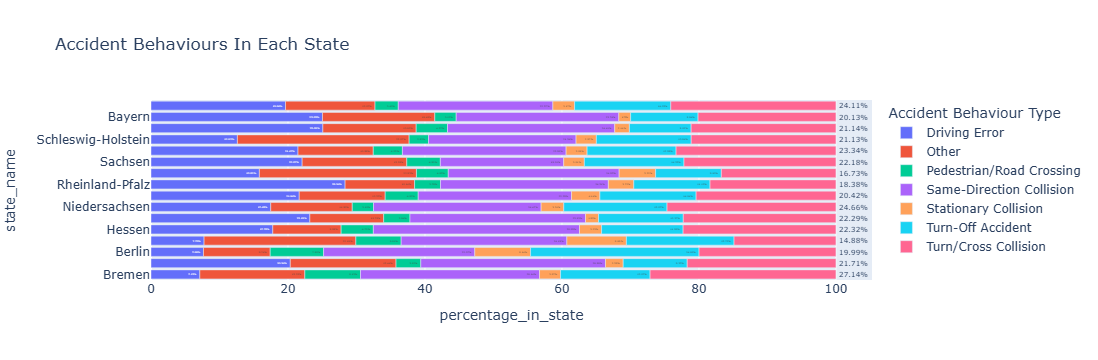

In [31]:
# visualizing accident behaviour in each state
fig = px.bar(
frequency_behaviour_type,
    x='percentage_in_state',
    y='state_name',
    color='accident_behaviour_label',
    orientation='h',
    title='Accident Behaviours In Each State',
    text='percentage_in_state'
)

# Format the text on bars to 2 decimal points + %
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')  # move text outside the bars
fig.update_yaxes(categoryorder='total ascending') 
fig.update_layout(legend_title_text='Accident Behaviour Type')

fig.show()

In [32]:
# saving image
fig.write_image("accident_behaviour.png", engine="orca")

##### Most common collison behaviours in each state are driving error, same-direction collision and turn/cross collision.

#### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far.

#### Questions answered:
##### 1) Which states have highest accident rate?
##### Schleswig-holstein, Hamburg and Bremen have the highest accident rate per 100k population.

##### 2) Do light conditions have any impact on accident occurrence?
##### Day light condition has the widest spread and the highest mean, indicating day light accidents are most common across all states. One reason of this could be that the traffic flow is highest during the day time.

##### 3) Do weather conditions influence accident frequency?(road surface condition is also indicative of weather)
#####  Most accidents occur under dry road conditions, wet and slippery accidents have much smaller avergaes as comapred to dry road accidents. We can say that since roads are mostly dry all year round, hence higher accident rate. Moreover even in winter/snow season roads are well matintained to avoid slippery conditions and use of winter tyers is mandatory by law, which also prevents cars from skidding and causing accidents.
##### 4) Which kind of accidents are occuring the most?
##### Crossing/turn collision, rear-end collision and other are the most common collision types across states.

##### 5) what accident behaviors are most common?
##### Most common collison behaviours in each state are driving error, same-direction collision and turn/cross collision.

#### Further possible questions to explore:
##### 1) Do mountain areas and rural areas tend to have more accidents due to slippery roads?
##### 2) Does these top accident kinds and behaviours relate to road conditions and light conditions?

#### Define any hypotheses that you can at this point. You’ll be testing these later on.
##### 1) Urban areas (major cities in NRW) have higher accident frequency but lower severity compared to rural regions.
##### 2) Cyclists and motorcyclists are disproportionately involved in severe or fatal accidents compared to car drivers.
##### 3) Accidents exhibit time-of-day clusters — e.g., peaks during morning (7–9 am) and evening (4–6 pm) rush hours.
##### 4) There are identifiable geographical hotspots (specific cities or intersections) where accidents cluster significantly.

#### Note: used Chatgpt to enhance visualizations.